In [1]:
import sys
import tensorflow as tf

sys.path.append('../usr/lib/eval-utils-nih')

import eval_utils_nih as eu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              23564800  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2156)              4417644   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2156)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1280)              2760960   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 540)               6

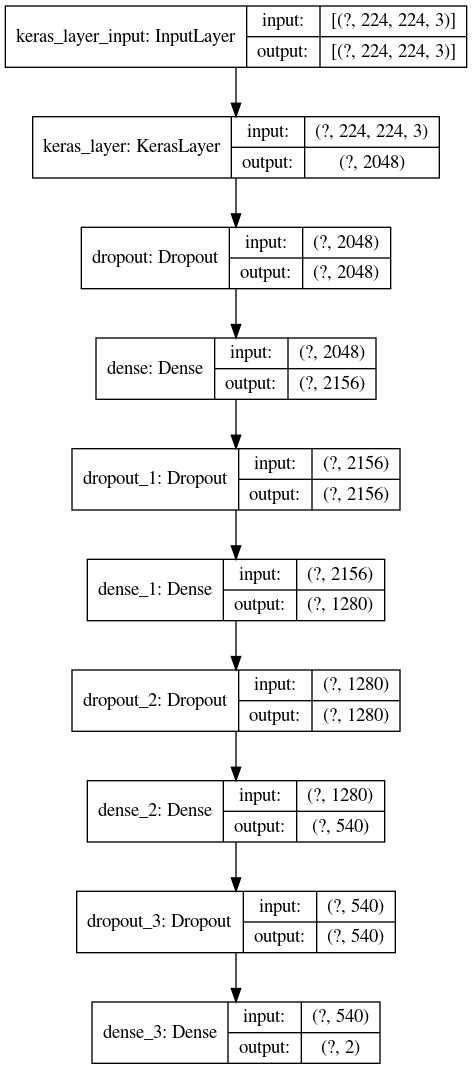

In [2]:
model = eu.load_model('../input/model-7', 'model.h5')

model.summary()

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [3]:
data_dir = '../input/chest-xray-pneumonia/chest_xray'
train_dir_name = 'train'
test_dir_name = 'test'
valid_dir_name = 'val'
classes = ['NORMAL', 'PNEUMONIA']

In [4]:
train_generator, valid_generator, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        classes,
        valid_dir_name
    )

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

163/163 [==============================] - 58s 353ms/step - loss: 7.7113 - accuracy: 0.2640

Loss: 7.711
Accuracy: 26.400%


In [6]:
eu.evaludate_model_n_print_loss_n_acc(model, valid_generator)

1/1 [==============================] - 0s 2ms/step - loss: 4.6228 - accuracy: 0.5000

Loss: 4.623
Accuracy: 50.000%


In [7]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

20/20 [==============================] - 6s 288ms/step - loss: 6.7446 - accuracy: 0.3766

Loss: 6.745
Accuracy: 37.660%


In [8]:
train_preds = eu.get_predictions(model, train_generator)

163/163 [==============================] - 54s 331ms/step


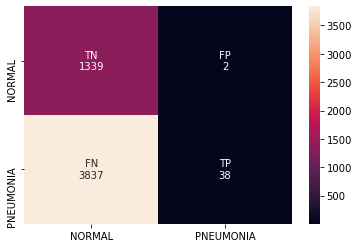

In [9]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    train_preds,
    classes,
    cmap=None
)

In [10]:
eu.generate_classification_report(
    train_generator,
    train_preds,
    classes
)

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.26      1.00      0.41      1341
   PNEUMONIA       0.95      0.01      0.02      3875

    accuracy                           0.26      5216
   macro avg       0.60      0.50      0.22      5216
weighted avg       0.77      0.26      0.12      5216



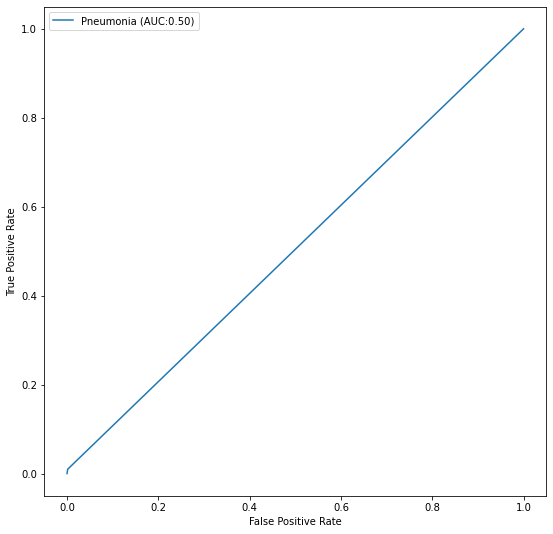

In [11]:
eu.plot_roc_curve(train_generator.classes, train_preds)

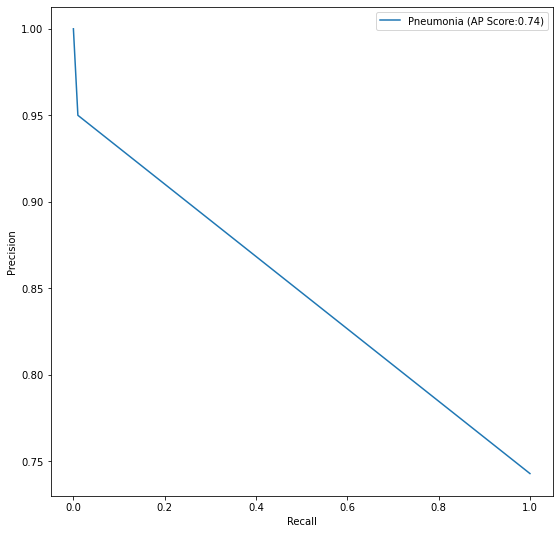

In [12]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

---
---

In [13]:
data_dir = '../input/chest-xray-covid19-pneumonia/Data'

train_generator, _, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        classes,
        valid_dir_name
    )

Found 1172 images belonging to 2 classes.
Found 4684 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [14]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

147/147 [==============================] - 59s 400ms/step - loss: 7.5952 - accuracy: 0.2754

Loss: 7.595
Accuracy: 27.541%


In [15]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

37/37 [==============================] - 14s 385ms/step - loss: 7.6184 - accuracy: 0.2816

Loss: 7.618
Accuracy: 28.157%


In [16]:
train_preds = eu.get_predictions(model, train_generator)

147/147 [==============================] - 48s 327ms/step


In [17]:
test_preds = eu.get_predictions(model, test_generator)

37/37 [==============================] - 11s 305ms/step


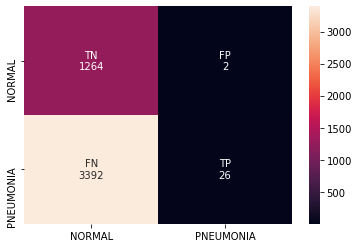

In [18]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    train_preds,
    classes,
    cmap=None
)

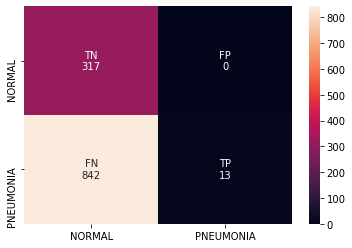

In [19]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    test_generator,
    test_preds,
    classes,
    cmap=None
)

In [20]:
eu.generate_classification_report(
    train_generator,
    train_preds,
    classes
)

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.27      1.00      0.43      1266
   PNEUMONIA       0.93      0.01      0.02      3418

    accuracy                           0.28      4684
   macro avg       0.60      0.50      0.22      4684
weighted avg       0.75      0.28      0.13      4684



In [21]:
eu.generate_classification_report(
    test_generator,
    test_preds,
    classes
)

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.27      1.00      0.43       317
   PNEUMONIA       1.00      0.02      0.03       855

    accuracy                           0.28      1172
   macro avg       0.64      0.51      0.23      1172
weighted avg       0.80      0.28      0.14      1172



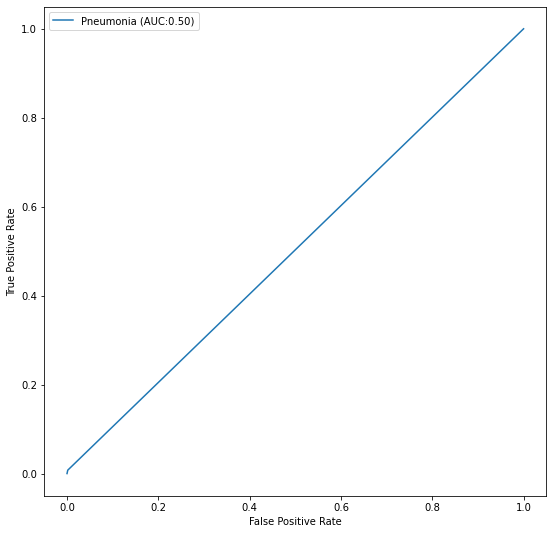

In [22]:
eu.plot_roc_curve(train_generator.classes, train_preds)

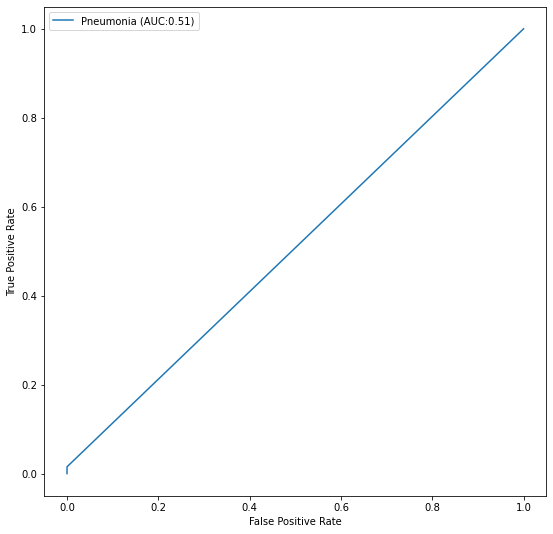

In [23]:
eu.plot_roc_curve(test_generator.classes, test_preds)

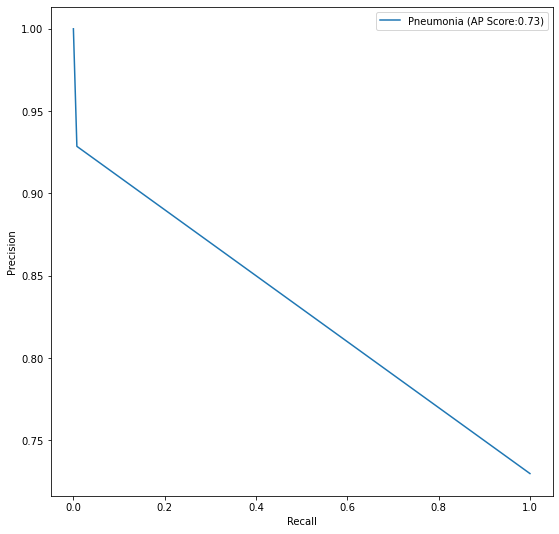

In [24]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

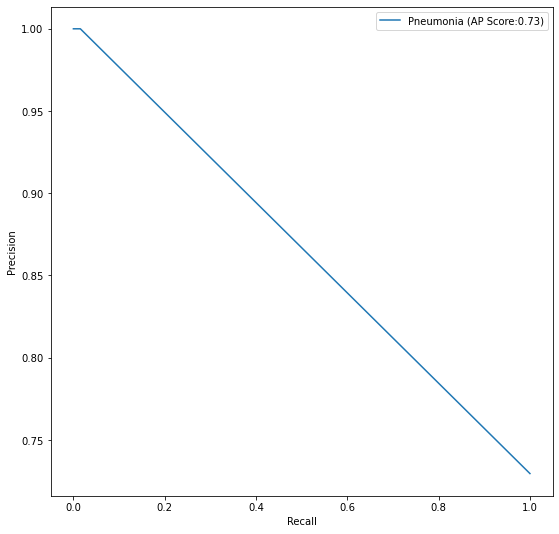

In [25]:
eu.plot_precision_recall_curve(test_generator.classes, test_preds)

In [26]:
data_dir = '../input/chest-xray-covid19-pneumonia/Data'
classes = ['COVID19', 'PNEUMONIA']

train_generator, _, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        classes,
        valid_dir_name
    )

Found 971 images belonging to 2 classes.
Found 3878 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [27]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

122/122 [==============================] - 41s 338ms/step - loss: 9.1905 - accuracy: 0.1176

Loss: 9.191
Accuracy: 11.759%


In [28]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

31/31 [==============================] - 10s 315ms/step - loss: 9.2145 - accuracy: 0.1195

Loss: 9.215
Accuracy: 11.946%


In [29]:
train_preds = eu.get_predictions(model, train_generator)

122/122 [==============================] - 40s 327ms/step


In [30]:
test_preds = eu.get_predictions(model, test_generator)

31/31 [==============================] - 10s 307ms/step


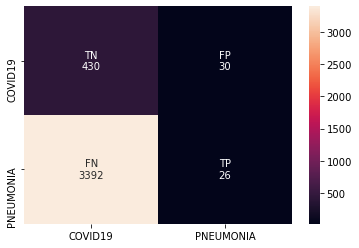

In [31]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    train_preds,
    classes,
    cmap=None
)

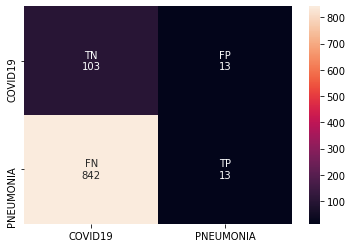

In [32]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    test_generator,
    test_preds,
    classes,
    cmap=None
)

In [33]:
eu.generate_classification_report(
    train_generator,
    train_preds,
    classes
)

Classification Report
              precision    recall  f1-score   support

     COVID19       0.11      0.93      0.20       460
   PNEUMONIA       0.46      0.01      0.01      3418

    accuracy                           0.12      3878
   macro avg       0.29      0.47      0.11      3878
weighted avg       0.42      0.12      0.04      3878



In [34]:
eu.generate_classification_report(
    test_generator,
    test_preds,
    classes
)

Classification Report
              precision    recall  f1-score   support

     COVID19       0.11      0.89      0.19       116
   PNEUMONIA       0.50      0.02      0.03       855

    accuracy                           0.12       971
   macro avg       0.30      0.45      0.11       971
weighted avg       0.45      0.12      0.05       971



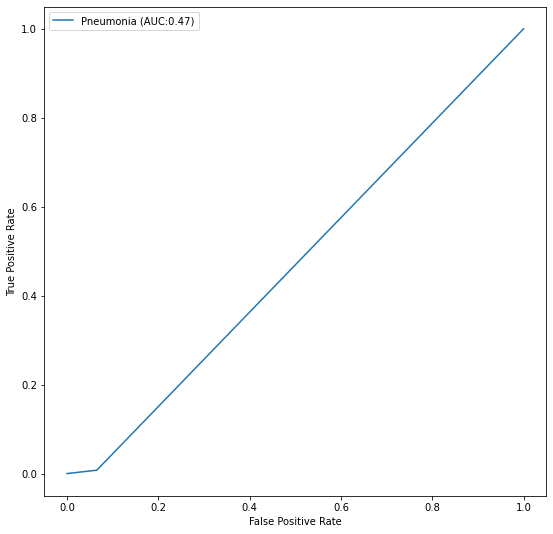

In [35]:
eu.plot_roc_curve(train_generator.classes, train_preds)

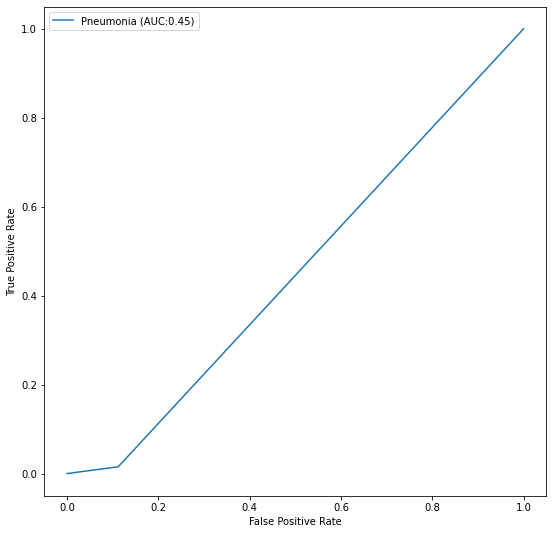

In [36]:
eu.plot_roc_curve(test_generator.classes, test_preds)

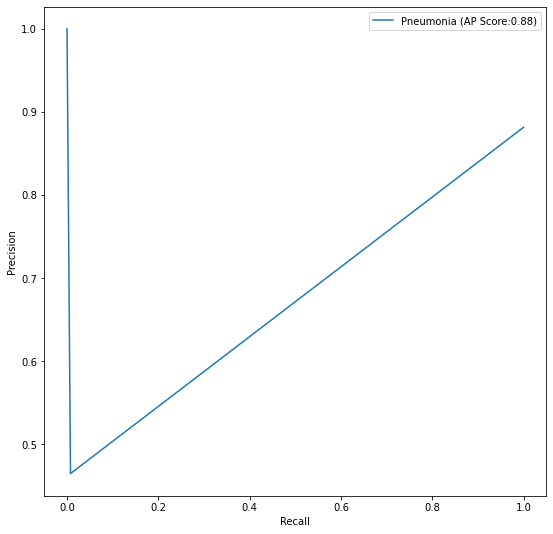

In [37]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

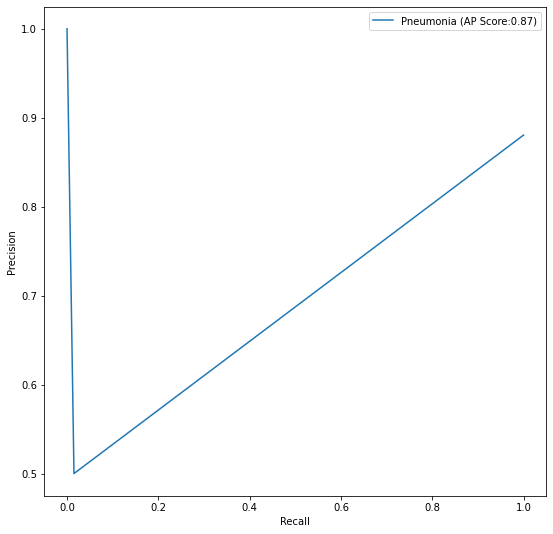

In [38]:
eu.plot_precision_recall_curve(test_generator.classes, test_preds)